In [1]:
from gspan_mining.config import parser
from gspan_mining.main import main
import numpy as np
import sys
egg_path='/gspan_mining.egg'

sys.path.append(egg_path)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def is_clique(g):
    vertices = g.vertices
    deg_list = [len(vertices[v].edges) for v in vertices]
    edge_count = int(np.sum(deg_list)//2)
    v_count = len(vertices)
    if edge_count == v_count*(v_count-1)/2:
        return True
    return False

In [41]:
def prob_format(g):
    vertices = g.vertices
    vertex_map = dict([(vertices[v].vid, vertices[v].vlb) for v in vertices])
    # print(vertex_map)
    edge_dict_lists = [vertices[v].edges for v in vertices]
    all_edge_list = []
    for edge_dict in edge_dict_lists:
        for key in list(edge_dict.keys()):
            new_edge = (edge_dict[key].frm, edge_dict[key].to)
            all_edge_list.append(new_edge)
            
    G = nx.from_edgelist(all_edge_list)
    adj_mat = nx.to_numpy_matrix(G)
    np.fill_diagonal(adj_mat, 0)
    return vertex_map, adj_mat 

In [4]:
def edge_count(g):
    vertices = g.vertices
    deg_list = [len(vertices[v].edges) for v in vertices]
    edge_count = int(np.sum(deg_list)//2)
    return edge_count

In [5]:
def node_count(g):
    vertices = g.vertices
    return len(vertices)

In [6]:
args_str = '-s 5 -d False -l 4 -e 5 -p False -w False -t False freq_subgraph_brain/graph0.05.txt'
FLAGS, _ = parser.parse_known_args(args=args_str.split())

In [7]:
gs = main(FLAGS)

Read:	5.79 s
Mine:	20.85 s
Total:	26.64 s


In [8]:
filtered_subgraphs = gs.filtered_subgraphs

In [43]:
import networkx as nx

cliques = []
for g, support in filtered_subgraphs:
    if is_clique(g):
        cliques.append((g, support))   
        vertex_map, adj_mat  = prob_format(g)
        print(adj_mat)
        print(vertex_map)

[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]
{0: 'Fn1', 1: 'Igf1r', 2: 'Ndrg1', 3: 'Slco1a4'}
[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]
{0: 'Ndrg1', 1: 'Sgk1', 2: 'Sox8', 3: 'Ttyh2'}
[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]
{0: 'Cspg5', 1: 'Gjc3', 2: 'Pdgfra', 3: 'Sox8'}
[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]
{0: 'Pdgfra', 1: 'Sox6', 2: 'Sox8', 3: 'Traf4'}
[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]
{0: 'Ermn', 1: 'Gjc3', 2: 'Sgk1', 3: 'Ttyh2'}
[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]
{0: 'Ermn', 1: 'Gjc3', 2: 'Ndrg1', 3: 'Sgk1'}
[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]
{0: 'Ermn', 1: 'Ndrg1', 2: 'Plin3', 3: 'Sgk1'}
[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]
{0: 'Ermn', 1: 'Ndrg1', 2: 'Sgk1', 3: 'Ttyh2'}
[[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]
{0: 'Ermn', 1: 'Plin3', 2: 'Sgk1', 3: 'Ttyh2'}
[[0. 1. 1. 1.]
 [1. 0. 1. 

<Figure size 288x288 with 0 Axes>

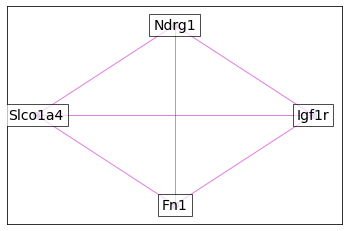

Support:  12


<Figure size 288x288 with 0 Axes>

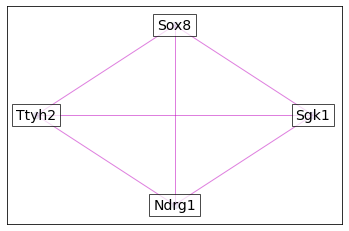

Support:  8


<Figure size 288x288 with 0 Axes>

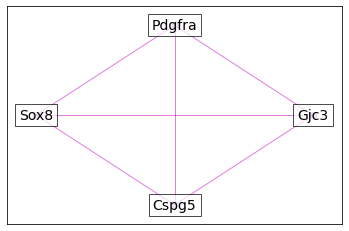

Support:  8


<Figure size 288x288 with 0 Axes>

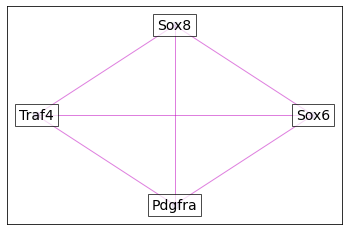

Support:  5


<Figure size 288x288 with 0 Axes>

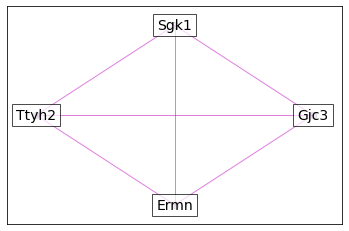

Support:  9


<Figure size 288x288 with 0 Axes>

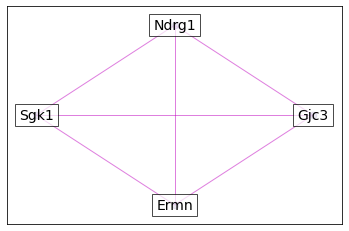

Support:  5


<Figure size 288x288 with 0 Axes>

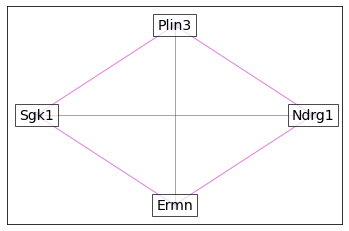

Support:  9


<Figure size 288x288 with 0 Axes>

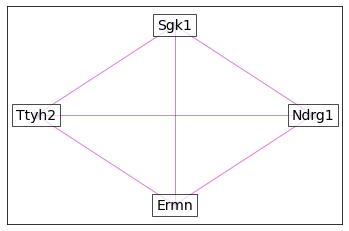

Support:  72


<Figure size 288x288 with 0 Axes>

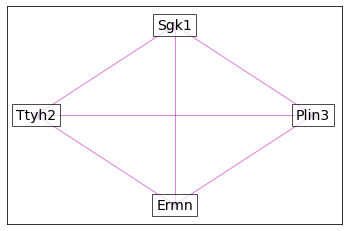

Support:  5


<Figure size 288x288 with 0 Axes>

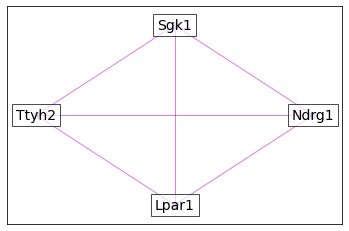

Support:  10


<Figure size 288x288 with 0 Axes>

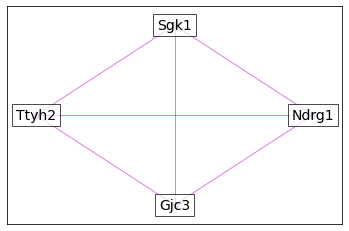

Support:  6


In [44]:
for g, support in cliques:
    g.plot()
    print('Support: ', support)

<Figure size 360x360 with 0 Axes>

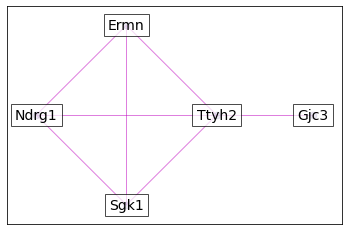

27


In [45]:
support_list = []
for g, support in filtered_subgraphs:
    v_count = node_count(g)
    if v_count > 4 and edge_count(g) > v_count*(v_count-1)//3 and support > 25:
        g.plot()
        support_list.append(support)
        print(support)

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([26.5       , 26.56666667, 26.63333333, 26.7       , 26.76666667,
        26.83333333, 26.9       , 26.96666667, 27.03333333, 27.1       ,
        27.16666667, 27.23333333, 27.3       , 27.36666667, 27.43333333,
        27.5       ]),
 <BarContainer object of 15 artists>)

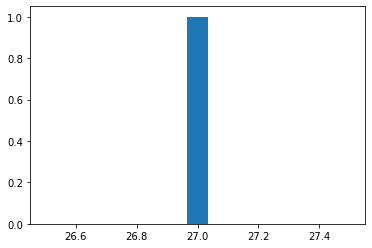

In [46]:
plt.hist(support_list, bins=15)

# Random graph:

In [79]:
args_str = '-s 2 -d False -l 3 -e 2 -p False -w False -t False freq_subgraph_rand_brain/graph0.05.txt'
FLAGS, _ = parser.parse_known_args(args=args_str.split())

In [80]:
gs_rand = main(FLAGS)

Read:	20.71 s
Mine:	1.4499999999999993 s
Total:	22.16 s


In [81]:
filtered_subgraphs_rand = gs_rand.filtered_subgraphs

In [82]:
cliques = []
for g, support in filtered_subgraphs_rand:
    if is_clique(g):
        cliques.append((g, support)) 

In [83]:
for g, support in cliques:
    g.plot()
    print('Support: ', support)

In [84]:
support_list = []
for g, support in filtered_subgraphs_rand:
    v_count = node_count(g)
    if v_count > 3 and edge_count(g) > v_count*(v_count-1)//3:
        g.plot()
        support_list.append(support)
        print(support)

Support:  2


<Figure size 216x216 with 0 Axes>

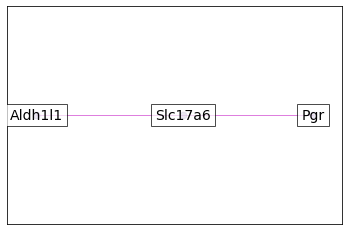

Support:  2


<Figure size 216x216 with 0 Axes>

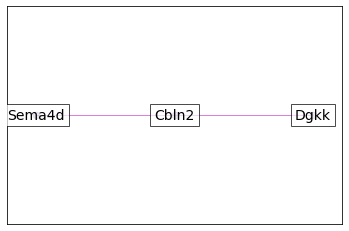

Support:  2


<Figure size 216x216 with 0 Axes>

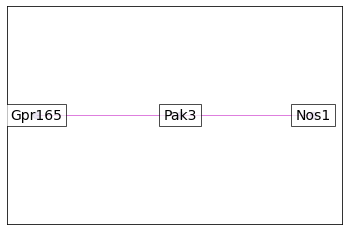

Support:  2


<Figure size 216x216 with 0 Axes>

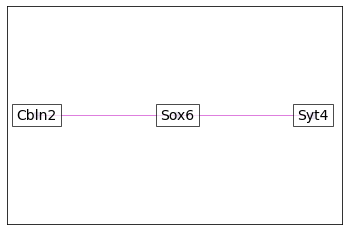

Support:  2


<Figure size 216x216 with 0 Axes>

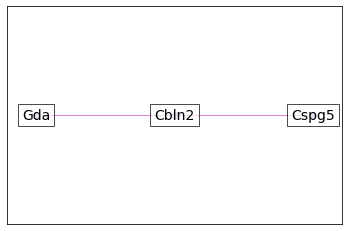

Support:  2


<Figure size 216x216 with 0 Axes>

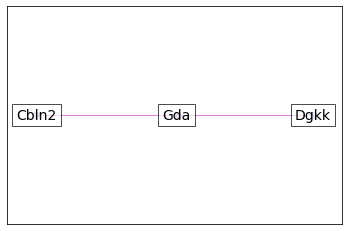

Support:  2


<Figure size 216x216 with 0 Axes>

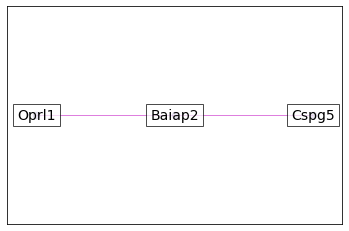

Support:  2


<Figure size 216x216 with 0 Axes>

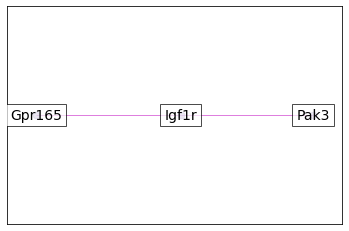

Support:  2


<Figure size 216x216 with 0 Axes>

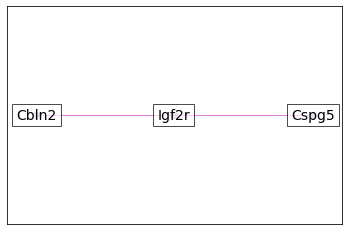

Support:  3


<Figure size 216x216 with 0 Axes>

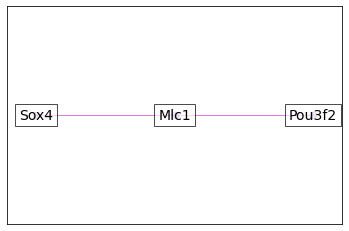

Support:  2


<Figure size 216x216 with 0 Axes>

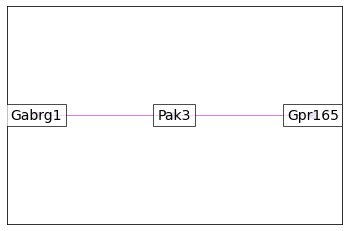

Support:  2


<Figure size 216x216 with 0 Axes>

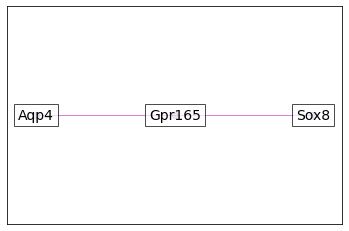

Support:  2


<Figure size 216x216 with 0 Axes>

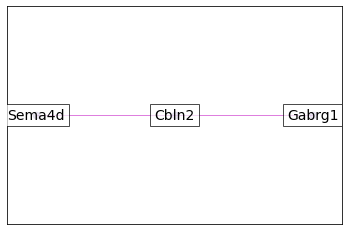

Support:  2


<Figure size 216x216 with 0 Axes>

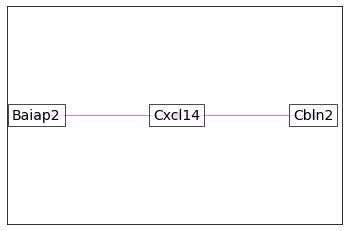

Support:  2


<Figure size 216x216 with 0 Axes>

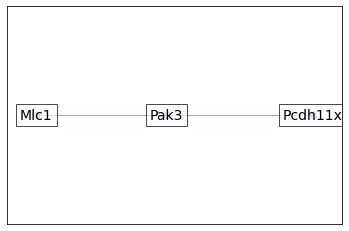

Support:  2


<Figure size 216x216 with 0 Axes>

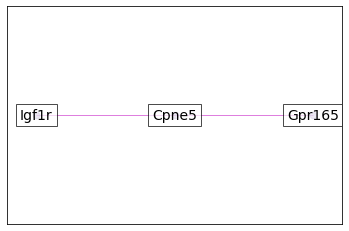

Support:  2


<Figure size 216x216 with 0 Axes>

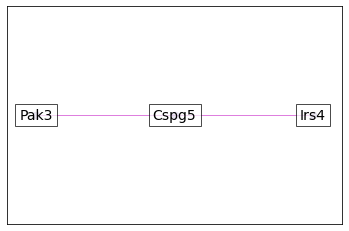

Support:  2


<Figure size 216x216 with 0 Axes>

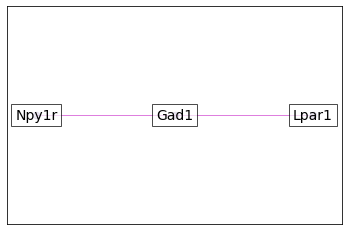

Support:  2


<Figure size 216x216 with 0 Axes>

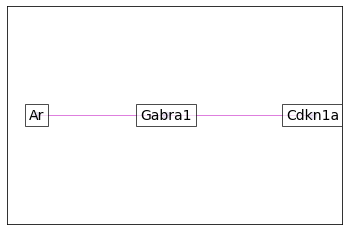

Support:  2


<Figure size 216x216 with 0 Axes>

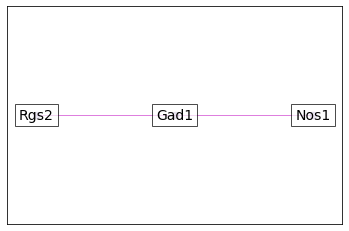

Support:  2


<Figure size 216x216 with 0 Axes>

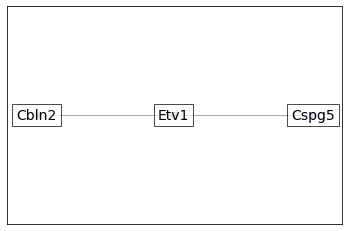

Support:  2


<Figure size 216x216 with 0 Axes>

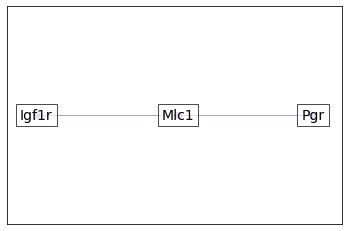

Support:  2


<Figure size 216x216 with 0 Axes>

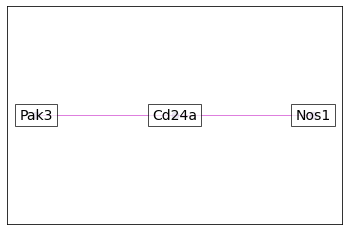

In [85]:
for g, s in filtered_subgraphs_rand:
    if s > 1:
        print('Support: ', s)
        g.plot()